In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import pickle

In [3]:
df=pd.read_csv('Tampa_mexican_restaurants.csv')
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'categories', 'hours'],
      dtype='object')

In [4]:
df.head(1)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories,hours
0,cCs7yPSyk8NdA-Ufoz_7hw,FodM8aoGMQO2zsQCQxBTYQ,v5ktgWMAARaczTMh2rAJKg,2.0,0,0,0,The service here has gone down. We used to go ...,2017-12-27 02:57:57,San Jose Mexican Restaurant,...,Lutz,FL,33558.0,28.189335,-82.541048,3.0,155,1,"Restaurants, Mexican, Salad","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."


In [5]:
stopwords = nltk.corpus.stopwords.words("english")
wnl = nltk.WordNetLemmatizer()

In [6]:
# vectorize
df['words'] = df['text'].apply(lambda x: nltk.word_tokenize(str(x).lower()))
df['words'].head()

0    [the, service, here, has, gone, down, ., we, u...
1    [what, a, hidden, gem, of, a, restaurant, ., w...
2    [first, visit, tonight, ., nice, ,, clean, pla...
3    [xtreme, tacos, has, become, one, of, my, favo...
4    [visited, last, night, with, a, group, of, six...
Name: words, dtype: object

In [7]:
# remove stopwords/punctuations, lemmatize
df['words'] = df['words'].apply(lambda word_list: [wnl.lemmatize(word) for word in word_list if word.isalpha() and word not in stopwords])
df['words'].head()

0    [service, gone, used, go, lot, go, another, on...
1    [hidden, gem, restaurant, everyone, else, go, ...
2    [first, visit, tonight, nice, clean, place, re...
3    [xtreme, taco, become, one, favorite, place, e...
4    [visited, last, night, group, six, ambiance, s...
Name: words, dtype: object

In [56]:
all_words = [word for sublist in df['words'] for word in sublist]
all_words[:5]

['service', 'gone', 'used', 'go', 'lot']

In [28]:
#df_titles = pd.DataFrame(all_words)
#df_titles.to_csv('titles.csv',index=False)

      food       taco       good      place      great       time    service    mexican       like        one      order        get       back         go restaurant      would    ordered     really      salsa       chip 
     31572      30524      19424      19281      15234      12899      12043      10535      10534      10143       9852       9781       9779       8970       8816       8674       8272       7905       7196       7105 


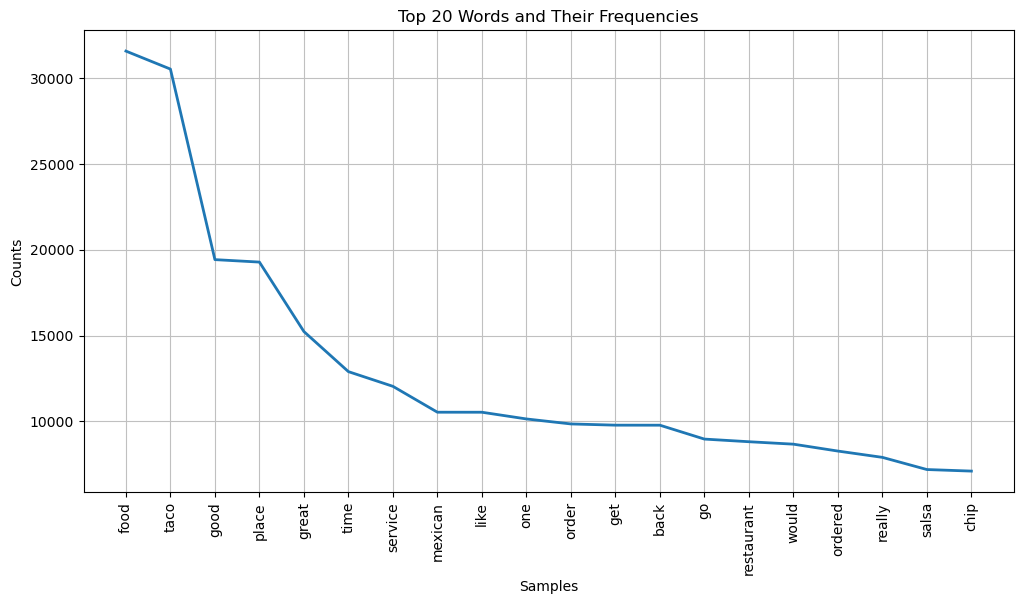

In [57]:
# frequency
fd = nltk.FreqDist(all_words)
fd.tabulate(20)

plt.figure(figsize=(12, 6))
plt.title('Top 20 Words and Their Frequencies')
fd.plot(20, cumulative=False)
plt.show()

      ('mexican', 'food')         ('chip', 'salsa') ('mexican', 'restaurant')         ('first', 'time')           ('taco', 'bus')            ('go', 'back')          ('food', 'good')          ('fish', 'taco')  ('authentic', 'mexican')        ('really', 'good')          ('come', 'back')         ('great', 'food')        ('carne', 'asada')         ('happy', 'hour')         ('food', 'great')          ('good', 'food')   ('customer', 'service')          ('taco', 'bell')   ('highly', 'recommend')        ('pretty', 'good') 
                     4011                      2241                      1782                      1769                      1549                      1533                      1527                      1511                      1465                      1464                      1283                      1282                      1274                      1203                      1195                      1131                      1110                      1067            

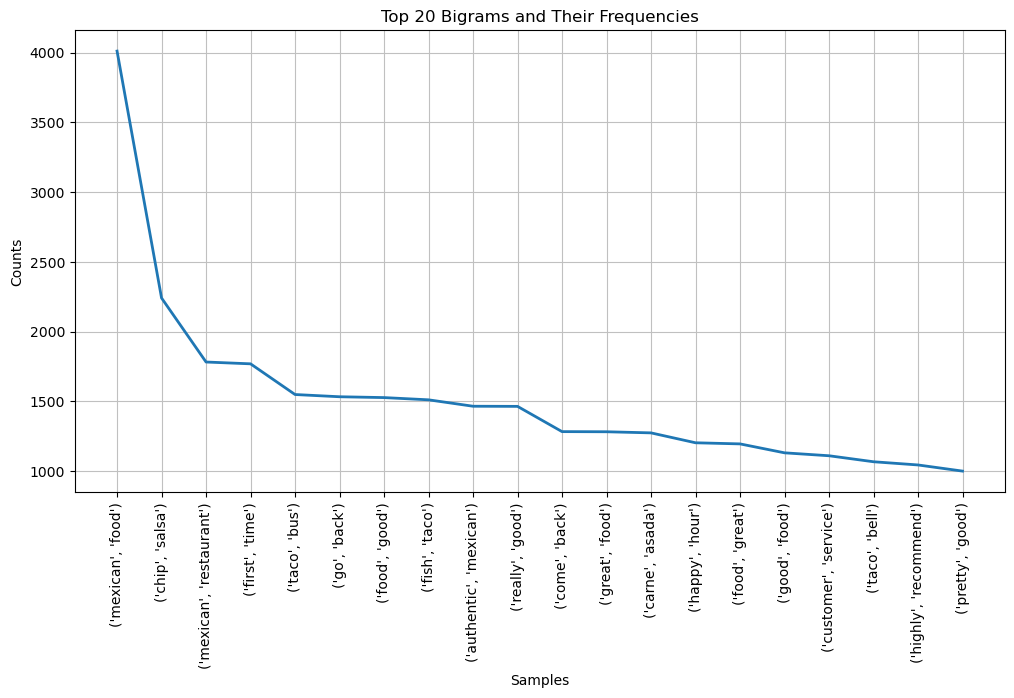

In [58]:
# bigram
finder2 = nltk.collocations.BigramCollocationFinder.from_words(all_words)
finder2.ngram_fd.tabulate(20)

bigram_fd = finder2.ngram_fd
plt.figure(figsize=(12, 6))
plt.title('Top 20 Bigrams and Their Frequencies')
bigram_fd.plot(20, cumulative=False)
plt.show()

('authentic', 'mexican', 'food')      ('best', 'mexican', 'food')      ('good', 'mexican', 'food')          ('pico', 'de', 'gallo')           ('wait', 'go', 'back')             ('ca', 'wait', 'go')       ('carne', 'asada', 'taco')   ('definitely', 'come', 'back')     ('mexican', 'food', 'tampa')     ('food', 'great', 'service')            ('ca', 'go', 'wrong') ('definitely', 'coming', 'back')   ('table', 'side', 'guacamole')       ('great', 'food', 'great')        ('best', 'taco', 'tampa')     ('mexican', 'food', 'place')          ('would', 'go', 'back')     ('definitely', 'go', 'back')      ('food', 'good', 'service')       ('food', 'really', 'good') 
                             717                              396                              330                              269                              260                              249                              242                              225                              225                              220          

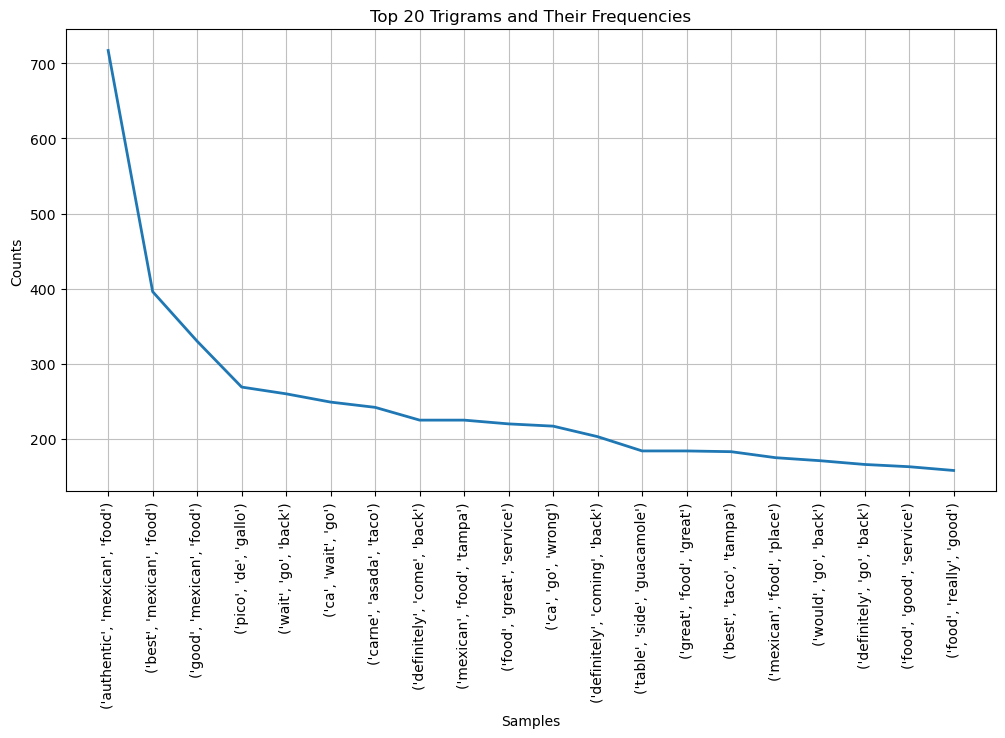

In [59]:
# trigram
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(all_words)
finder3.ngram_fd.tabulate(20)

trigram_fd = finder3.ngram_fd
plt.figure(figsize=(12, 6))
plt.title('Top 20 Trigrams and Their Frequencies')
trigram_fd.plot(20, cumulative=False)
plt.show()

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [15]:
df['sentiment'] = df['text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [16]:
print(df[['text','sentiment','stars_y']].head())

                                                text  sentiment  stars_y
0  The service here has gone down. We used to go ...    -0.3291      3.0
1  What a hidden gem of a restaurant.  While ever...    -0.1280      4.5
2  First visit tonight. Nice, clean place. Reason...     0.8791      3.0
3  Xtreme Tacos has become one of my favorite pla...     0.9833      4.5
4  Visited last night with a group of six. Ambian...     0.7000      4.0


In [17]:
df['text'][1]

"What a hidden gem of a restaurant.  While everyone else go to Taco Bus and stands in long lines I'll come here to Taco Son and get just as good of food without the lines. Everything here is made from scratch and you can taste the freshness of the ingredients.  The portions are big so you get your monies worth. Oh and their breakfast burritos are killer grab you one after a long night."

In [18]:
# save needed data in pickle and csv form
df_use = df[['stars_x','stars_y','text','words','date','review_count','is_open','sentiment']]
with open('reviews_vectorized.pkl', 'wb') as file:
    pickle.dump(df_use, file)
df_use.to_csv('sentiment.csv',index=False)

In [ ]:
# Open the file in binary read mode
#with open(file_path, 'rb') as file:
    # Use pickle to load the object from the file
#    loaded_object = pickle.load(file)

In [20]:
# next step: check top and bottom sentiment and star rating, do word frequency again
df_use['sentiment'].quantile(0.75)

0.9686250000000001

In [21]:
df_use['stars_y'].quantile(0.75)

4.0

In [44]:
df_top=df_use[df_use['stars_y']>3.5]

In [45]:
df_top.shape

(19973, 8)

In [46]:
all_words = [word for sublist in df_top['words'] for word in sublist]

In [47]:
fd = nltk.FreqDist(all_words)
fd.tabulate(20)

      taco       food      place       good      great       time    mexican    service       back       like        one restaurant        get         go  delicious      order      would     really    ordered       best 
     19694      17599      11969      11493       9649       6728       6445       6437       5552       5551       5359       5163       5114       4933       4910       4826       4700       4698       4565       4485 


In [48]:
finder2 = nltk.collocations.BigramCollocationFinder.from_words(all_words)
finder2.ngram_fd.tabulate(20)

      ('mexican', 'food')         ('chip', 'salsa')         ('first', 'time')  ('authentic', 'mexican')        ('really', 'good') ('mexican', 'restaurant')          ('fish', 'taco')            ('go', 'back')         ('great', 'food')          ('food', 'good')        ('carne', 'asada')   ('highly', 'recommend')         ('food', 'great')          ('best', 'taco')          ('come', 'back')         ('happy', 'hour')         ('love', 'place')          ('good', 'food')          ('next', 'time')         ('food', 'truck') 
                     2517                      1267                      1047                      1017                       939                       937                       933                       920                       854                       829                       797                       766                       747                       732                       730                       724                       657                       646            

In [49]:
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(all_words)
finder3.ngram_fd.tabulate(20)

('authentic', 'mexican', 'food')      ('best', 'mexican', 'food')           ('wait', 'go', 'back')             ('ca', 'wait', 'go')      ('good', 'mexican', 'food')     ('mexican', 'food', 'tampa')        ('best', 'taco', 'tampa')            ('ca', 'go', 'wrong')       ('carne', 'asada', 'taco')          ('pico', 'de', 'gallo') ('definitely', 'coming', 'back')   ('definitely', 'come', 'back')     ('food', 'great', 'service')         ('best', 'taco', 'ever')   ('table', 'side', 'guacamole')        ('pork', 'belly', 'taco')       ('great', 'food', 'great')         ('taco', 'al', 'pastor')     ('mexican', 'food', 'place')     ('definitely', 'go', 'back') 
                             498                              314                              210                              204                              203                              177                              169                              161                              159                              152          

In [50]:
df_top=df_use[(df_use['sentiment']>0.968) & (df_use['stars_y']>3.5)]

In [51]:
df_top.shape

(5929, 8)

In [52]:
all_words = [word for sublist in df_top['words'] for word in sublist]

In [53]:
fd = nltk.FreqDist(all_words)
fd.tabulate(20)

      taco       food      place       good      great       time       like    mexican        one restaurant  delicious       also    service     really       back    ordered       love        get      would      salsa 
      8633       6729       5234       5228       4795       2966       2854       2704       2621       2570       2560       2481       2389       2372       2337       2263       2230       2208       2128       2108 


In [54]:
finder2 = nltk.collocations.BigramCollocationFinder.from_words(all_words)
finder2.ngram_fd.tabulate(20)

      ('mexican', 'food')         ('chip', 'salsa')         ('first', 'time')         ('happy', 'hour')        ('really', 'good') ('mexican', 'restaurant')          ('fish', 'taco')        ('carne', 'asada')            ('go', 'back')   ('highly', 'recommend')         ('great', 'food')          ('come', 'back')          ('next', 'time')  ('authentic', 'mexican')         ('food', 'great')    ('definitely', 'back')         ('love', 'place')          ('rice', 'bean')        ('pretty', 'good')          ('hot', 'sauce') 
                      919                       691                       492                       479                       441                       426                       406                       402                       351                       345                       339                       334                       322                       302                       300                       290                       287                       280            

In [55]:
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(all_words)
finder3.ngram_fd.tabulate(20)

    ('authentic', 'mexican', 'food')          ('best', 'mexican', 'food')              ('pico', 'de', 'gallo')               ('wait', 'go', 'back')                 ('ca', 'wait', 'go')          ('good', 'mexican', 'food')                ('ca', 'go', 'wrong')     ('definitely', 'coming', 'back')            ('pork', 'belly', 'taco')       ('definitely', 'come', 'back')           ('carne', 'asada', 'taco')       ('table', 'side', 'guacamole')         ('mexican', 'food', 'tampa')   ('complimentary', 'chip', 'salsa')             ('love', 'love', 'love')           ('great', 'food', 'great')         ('food', 'great', 'service')             ('tampa', 'bay', 'area') ('would', 'definitely', 'recommend')             ('al', 'pastor', 'taco') 
                                 120                                  108                                  104                                   96                                   93                                   82                                   76 

In [60]:
df_use['stars_y'].quantile(0.25) #3.5 still kind of high; word frequency results looks kind of positive

3.5

In [69]:
df_use['stars_x'].quantile(0.25) # bottom quantile for average star rating

3.0

In [61]:
df_use['sentiment'].quantile(0.25)

0.6388750000000001

In [70]:
df_bot=df_use[df_use['stars_y']<3]

In [71]:
df_bot.shape

(3214, 8)

In [72]:
all_words = [word for sublist in df_bot['words'] for word in sublist]

In [73]:
fd = nltk.FreqDist(all_words)
fd.tabulate(20)

    food    order     time     taco      get location chipotle      one  service     like    place     good       go  burrito     back    would   always  ordered      got     chip 
    2797     1724     1679     1536     1267     1254     1242     1182     1164     1119     1107     1071     1016      870      818      805      725      722      697      684 


In [74]:
finder2 = nltk.collocations.BigramCollocationFinder.from_words(all_words)
finder2.ngram_fd.tabulate(20)

         ('taco', 'bell')   ('customer', 'service')         ('sour', 'cream')       ('mexican', 'food')          ('fast', 'food')         ('chip', 'salsa')         ('every', 'time')         ('drive', 'thru')       ('burrito', 'bowl')      ('love', 'chipotle') ('mexican', 'restaurant')         ('first', 'time')            ('go', 'back')          ('food', 'good')       ('online', 'order')          ('last', 'time')          ('come', 'back')           ('get', 'food')  ('chipotle', 'location')        ('pretty', 'good') 
                      587                       237                       187                       182                       181                       159                       149                       134                       130                       130                       126                       121                       112                       106                       104                        95                        82                        79            

In [75]:
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(all_words)  # results too small
finder3.ngram_fd.tabulate(20)

   ('worst', 'chipotle', 'ever')        ('worst', 'taco', 'bell')   ('fast', 'food', 'restaurant')         ('taco', 'bell', 'ever')          ('every', 'time', 'go')        ('every', 'time', 'come')      ('every', 'single', 'time') ('authentic', 'mexican', 'food')      ('cheese', 'sour', 'cream') ('love', 'chipotle', 'location')          ('pico', 'de', 'gallo')        ('fast', 'food', 'place')          ('never', 'go', 'back')         ('love', 'taco', 'bell')        ('rice', 'black', 'bean')         ('give', 'zero', 'star')          ('could', 'care', 'le')        ('get', 'order', 'right')      ('good', 'mexican', 'food')          ('taco', 'bell', 'one') 
                              34                               33                               29                               29                               29                               27                               23                               19                               19                               19          

In [82]:
df_bot=df_use[(df_use['sentiment']<0.65) & (df_use['stars_y']<3.5)]

In [83]:
df_bot.shape

(3611, 8)

In [84]:
all_words = [word for sublist in df_bot['words'] for word in sublist]

In [85]:
fd = nltk.FreqDist(all_words)
fd.tabulate(20)

    food    order     taco     time    place  service      get      one     like location       go     back  ordered    would     good chipotle      got     even    never   minute 
    3186     1888     1856     1718     1365     1277     1177     1164     1105     1063     1045      992      938      937      913      797      792      788      775      703 


In [86]:
finder2 = nltk.collocations.BigramCollocationFinder.from_words(all_words)
finder2.ngram_fd.tabulate(20)

         ('taco', 'bell')   ('customer', 'service')           ('taco', 'bus')       ('mexican', 'food')         ('sour', 'cream')         ('first', 'time')            ('go', 'back') ('mexican', 'restaurant')         ('chip', 'salsa')         ('every', 'time')          ('food', 'good')        ('tasted', 'like')          ('last', 'time')         ('drive', 'thru')          ('fast', 'food')       ('online', 'order')           ('get', 'food')          ('come', 'back')        ('even', 'though')         ('going', 'back') 
                      476                       235                       225                       223                       161                       156                       140                       138                       133                       121                       118                       110                       102                        99                        98                        98                        92                        91            

In [87]:
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(all_words)  # results too small
finder3.ngram_fd.tabulate(20)

          ('worst', 'taco', 'bell')       ('worst', 'chipotle', 'ever')             ('never', 'go', 'back')         ('every', 'single', 'time')    ('authentic', 'mexican', 'food')            ('give', 'zero', 'star')            ('taco', 'bell', 'ever')             ('every', 'time', 'go') ('horrible', 'customer', 'service')           ('every', 'time', 'come')         ('go', 'somewhere', 'else')     ('worst', 'experience', 'ever')     ('would', 'recommend', 'place')           ('get', 'order', 'right')           ('zero', 'star', 'would')            ('took', 'long', 'time')         ('food', 'good', 'service')          ('carne', 'asada', 'taco')        ('worst', 'service', 'ever')           ('could', 'give', 'zero') 
                                 33                                  33                                  32                                  30                                  26                                  26                                  25                            

In [ ]:
#different words summary in word doc 'word_freq.docx'